## Is it a Cat or dog ?

**Steps:**
- Download Oxford Pets dataset from fastai
- Create dataloaders
- Finetuning a pretrained model to classify cats
- Use model to predit "Is it a Cat" ?  


In [1]:
import fastbook
fastbook.setup_book()

In [2]:
from fastbook import *

In [3]:
from fastai.vision.all import *

In [3]:
path = untar_data(URLs.PETS)

- `untar_data(...)` downloads a standard dataset from the fast.ai datasets collection (if
not previously downloaded) to your server, extracts it (if not previously extracted),
and returns a Path object with the extracted location:

In [4]:
path

Path('/home/saurav/.fastai/data/oxford-iiit-pet')

In [5]:
path.ls()

(#3) [Path('/home/saurav/.fastai/data/oxford-iiit-pet/images'),Path('/home/saurav/.fastai/data/oxford-iiit-pet/models'),Path('/home/saurav/.fastai/data/oxford-iiit-pet/annotations')]

In [6]:
files = get_image_files(path/"images")

In [7]:
len(files)

7390

To label our data for the cats vs dogs problem, we need to know which filenames are of dog pictures and which ones are of cat pictures. 

In [8]:
files[1244]

Path('/home/saurav/.fastai/data/oxford-iiit-pet/images/Ragdoll_3.jpg')

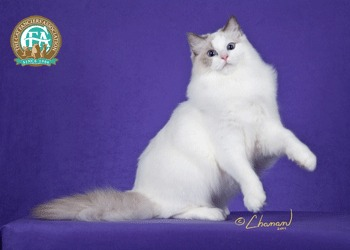

In [10]:
PILImage.create(files[1244])

In [11]:
files[116]

Path('/home/saurav/.fastai/data/oxford-iiit-pet/images/german_shorthaired_152.jpg')

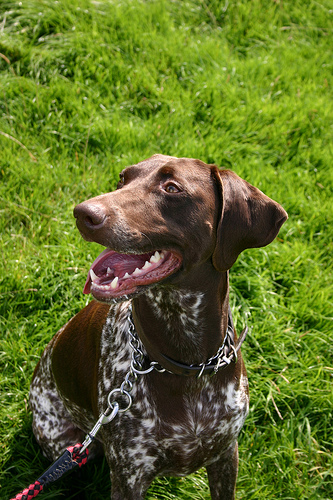

In [12]:
PILImage.create(files[116])

- In the dataset, name of the file begins with a capital for cats, and a lowercased letter for dogs.
- Lets create a label function using this info.

In [1]:
def label_func(f): 
    if f[0].isupper():
        return "cat"
    else: return "dog"

In [2]:
label_func("Meow")

'cat'

In [3]:
label_func("bark")

'dog'

To get our data ready for a model, we need to put it in a `DataLoaders` object.

Here we have a function that labels using the file names, so we will use `ImageDataLoaders.from_name_func`.

In [15]:
dls = ImageDataLoaders.from_name_func(path, files, label_func, item_tfms= Resize(224) )

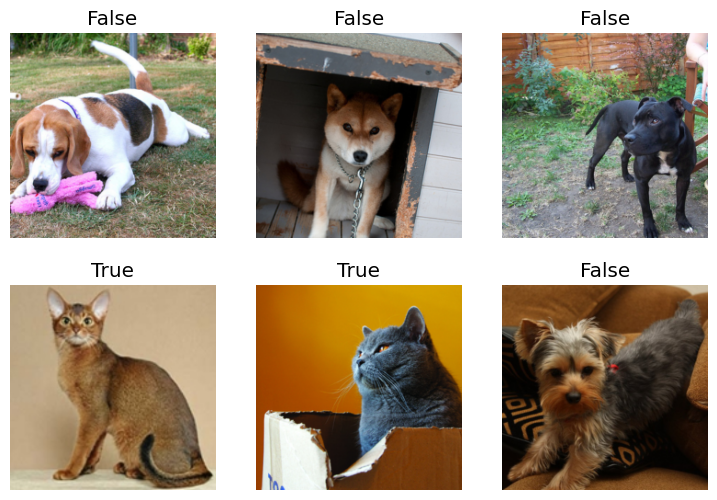

In [16]:
dls.show_batch(max_n=6)

In [18]:
?ImageDataLoaders.from_name_func

Signature:
ImageDataLoaders.from_name_func(
    path: 'str | Path',
    fnames: 'list',
    label_func: 'callable',
    *,
    valid_pct=0.2,
    seed=None,
    item_tfms=None,
    batch_tfms=None,
    img_cls=<class 'fastai.vision.core.PILImage'>,
    bs: 'int' = 64,
    val_bs: 'int' = None,
    shuffle: 'bool' = True,
    device=None,
) -> 'DataLoaders'
Docstring: Create from the name attrs of `fnames` in `path`s with `label_func`
File:      ~/miniconda3/lib/python3.12/site-packages/fastai/vision/data.py
Type:      method

we can create a `Learner`, which is a fastai object that combines the data and a model for training, and uses transfer learning to fine tune a pretrained model in just two lines of code:

In [19]:
import torch

# Check if CUDA (GPU) is available
if torch.cuda.is_available():
    device = torch.device('cuda')  # set device to GPU
    print(f"Using {torch.cuda.get_device_name(0)}")

else:
    device = torch.device('cpu') # set device to cpu
    print("CUDA (GPU) is not available. Using CPU")
    

Using NVIDIA GeForce GTX 1050 Ti


In [20]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.150051,0.014606,0.006089,00:55


epoch,train_loss,valid_loss,error_rate,time
0,0.069261,0.018607,0.006089,01:19


In [21]:
uploader = widgets.FileUpload()
uploader

FileUpload(value=(), description='Upload')

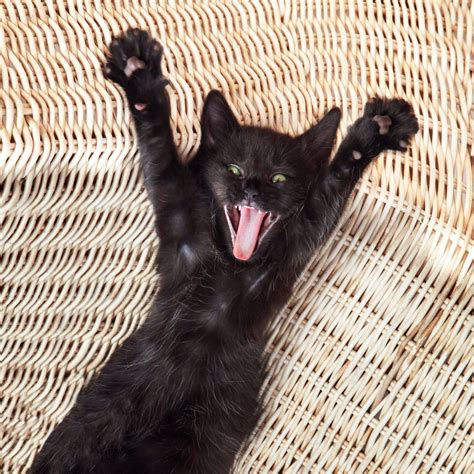

In [53]:
PILImage.create(uploader.value[0].content.tobytes())

In [54]:
im = PILImage.create(uploader.value[0].content.tobytes())
is_cat,_,prob = learn.predict(im)

In [55]:
print(f"Is this a cat ? : {is_cat}" )
print(f"Probability of prediction = {prob[_]:0.4f}")

Is this a cat ? : True
Probability of prediction = 0.7718


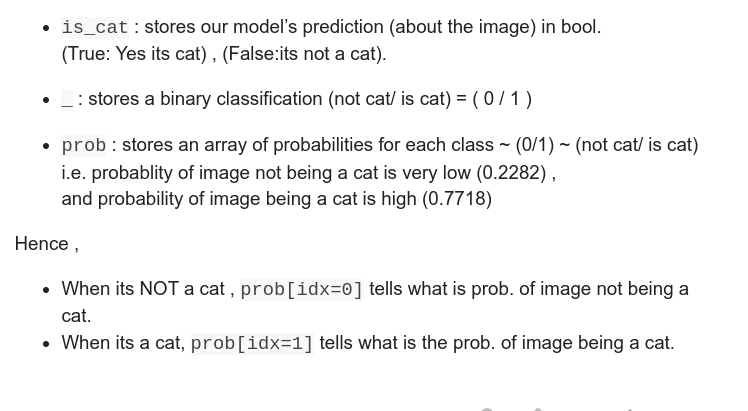

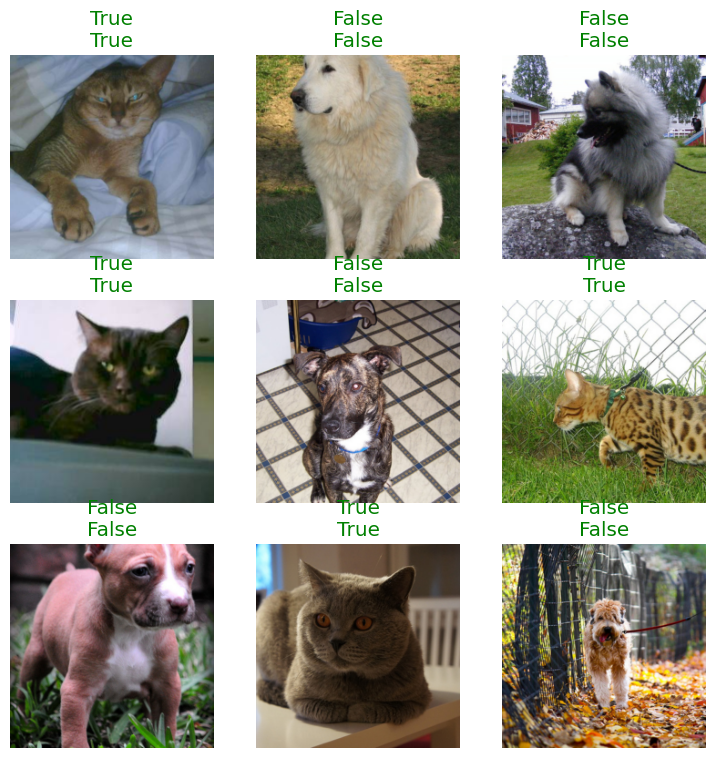

In [42]:
learn.show_results()

In [43]:
interp = ClassificationInterpretation.from_learner(learn)

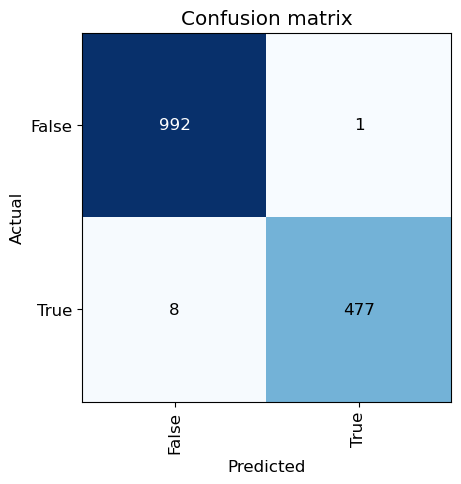

In [44]:
interp.plot_confusion_matrix()

- 8 times, Our model predicted its Not a cat (but it was cat , actually)
- 1 time, our model predicted , its a cat, but it was NOT cat , actually.

In [40]:
learn.save('is_cat_model')  # Saving weights

Path('/home/saurav/.fastai/data/oxford-iiit-pet/models/is_cat_model.pth')

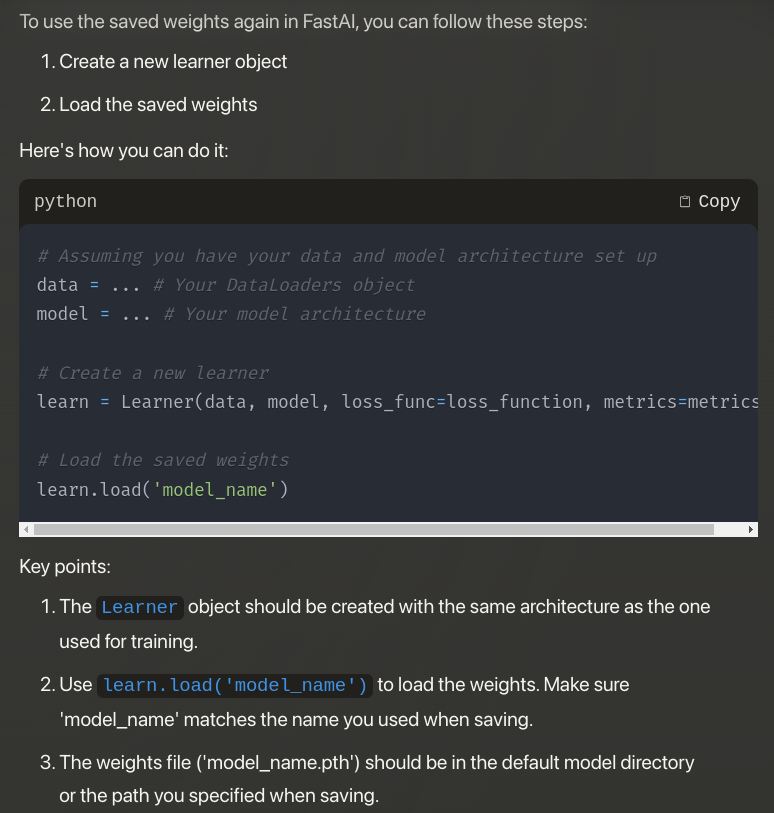